In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


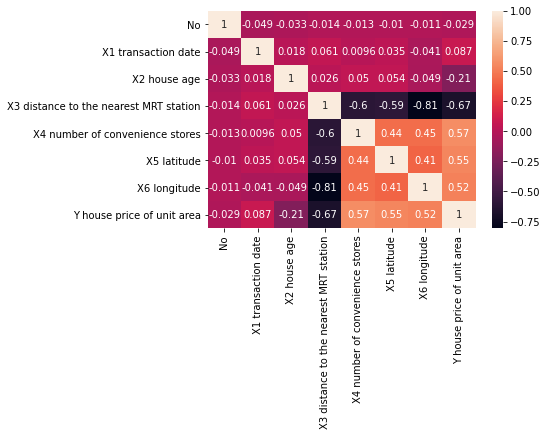

In [5]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df = df.drop(columns = 'No')

In [8]:
Y = df['Y house price of unit area']

In [9]:
X = df.drop(columns = ['Y house price of unit area', 'X1 transaction date', 'X2 house age'])

In [10]:
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [11]:
x_train.dtypes

X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
dtype: object

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, lin_reg_y_pred)
print(mse)

63.90493104709001


In [13]:
coeff_lin = pd.DataFrame()
coeff_lin["Columns"] = x_train.columns
coeff_lin["Coefficients"]  = pd.Series(lin_reg.coef_)
print(coeff_lin)

                                  Columns  Coefficients
0  X3 distance to the nearest MRT station     -0.004709
1         X4 number of convenience stores      1.007691
2                             X5 latitude    221.632669
3                            X6 longitude     -8.841321


In [14]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(mse)

67.04829587817319


In [15]:
coeff_lasso = pd.DataFrame()
coeff_lasso["Columns"] = x_train.columns
coeff_lasso["Coefficients"]  = pd.Series(lasso.coef_)
print(coeff_lasso)

                                  Columns  Coefficients
0  X3 distance to the nearest MRT station     -0.005994
1         X4 number of convenience stores      0.958896
2                             X5 latitude      0.000000
3                            X6 longitude     -0.000000


In [16]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(mse)

66.07258621837418


In [17]:
coeff_ridge = pd.DataFrame()
coeff_ridge["Columns"] = x_train.columns
coeff_ridge["Coefficients"]  = pd.Series(ridge.coef_)
print(coeff_ridge)

                                  Columns  Coefficients
0  X3 distance to the nearest MRT station     -0.005700
1         X4 number of convenience stores      1.135925
2                             X5 latitude      7.304642
3                            X6 longitude     -0.915969


<Figure size 2160x432 with 0 Axes>

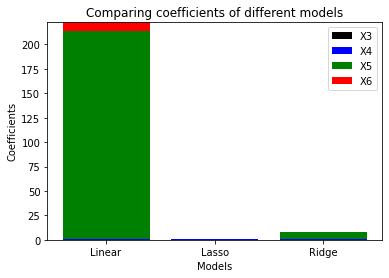

In [18]:
plt.figure(figsize=(30,6))
x = ['Linear', 'Lasso', 'Ridge']
y1 = np.array([-0.004709, -0.005994, 0.005700])
y2 = np.array([1.007691, 0.958896,  1.135925])
y3 = np.array([221.632669, 0.000000, 7.304642])
y4 = np.array([-8.841321, -0.000000, -0.915969])
fig, axes = plt.subplots(ncols=1, nrows=1)
plt.bar(x, y1, color = 'black')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.bar(x, y4, bottom=y1+y2+y3, color='r')
plt.xlabel("Models")
plt.ylabel("Coefficients")
plt.legend(["X3", "X4", "X5", "X6"])
plt.title("Comparing coefficients of different models")
axes.set_xticklabels(['Linear', 'Lasso', 'Ridge'])
plt.show()

In [19]:
!pip install yellowbrick

In [20]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


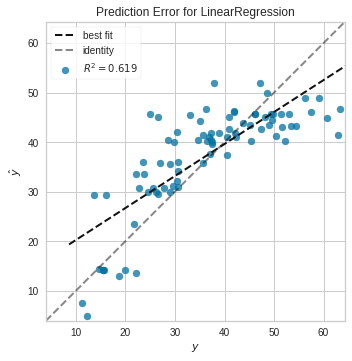

In [21]:
visualizer = PredictionError(lin_reg)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

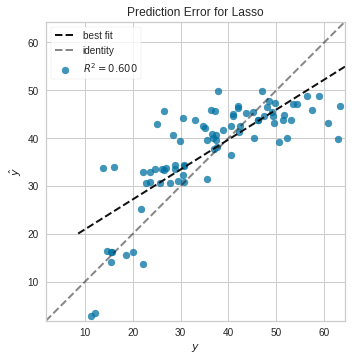

In [22]:
visualizer = PredictionError(lasso)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

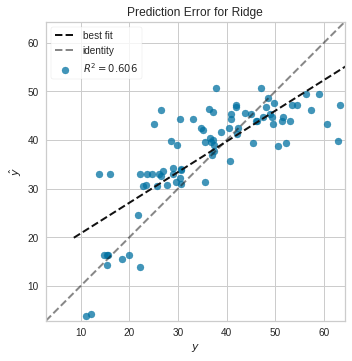

In [23]:
visualizer = PredictionError(ridge)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

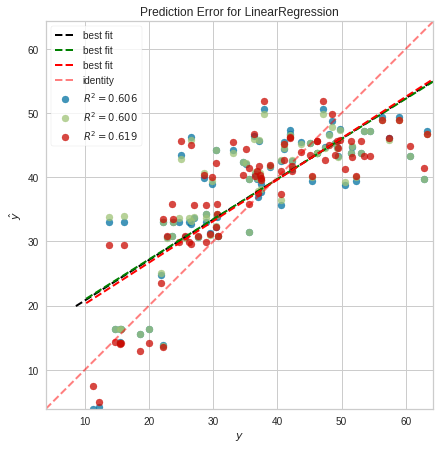

In [24]:
from yellowbrick.features import RadViz
visualizer = RadViz(size=(500, 900))
visualizer_1 = PredictionError(ridge, line_color = 'black')
visualizer_1.fit(x_train, y_train)  
visualizer_1.score(x_test, y_test)  
# visualizer_1.poof()
visualizer_2 = PredictionError(lasso, line_color = 'green')
visualizer_2.fit(x_train, y_train)  
visualizer_2.score(x_test, y_test)  
# visualizer_2.poof()
visualizer_3 = PredictionError(lin_reg, line_color = 'red')
visualizer_3.fit(x_train, y_train)  
visualizer_3.score(x_test, y_test)  
visualizer_3.poof()